In [11]:
def get_knowledge(file, predicate):
    kb_tuples = []
    with open(file, 'r') as f:
        for line in f:
            if line.startswith("(" + predicate):
                kb_tuples.append(tuple(line[1:-2].split(" ")[1:]))
    return kb_tuples

location_facts_file = "../kb/location_facts.krf"
location_ontology_file = "../kb/location_ontology.krf"

adjacent = get_knowledge(location_facts_file, "adjacent")
isa = get_knowledge(location_ontology_file, "isa")

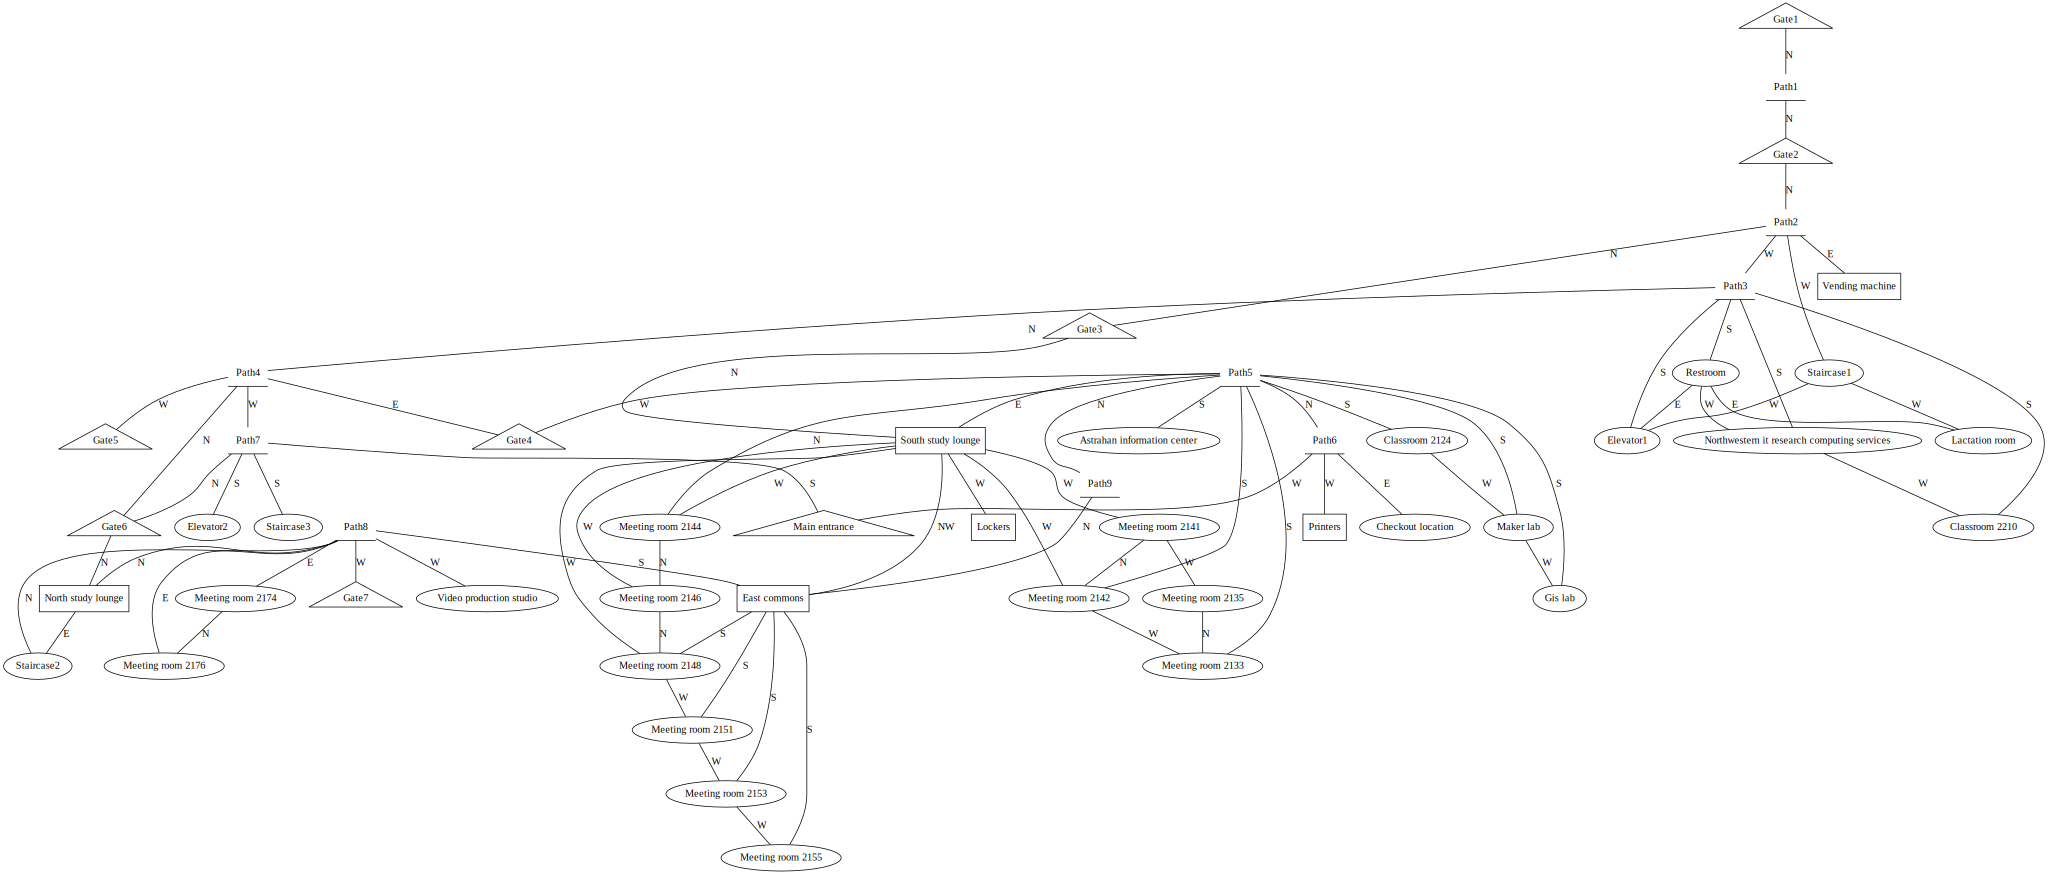

In [12]:
from graphviz import Digraph


def translate_name(name):
    return " ".join(name.split("-")).capitalize()

def translate_direction(dir):
    return {
        "West-Directly": "W",
        "East-Directly": "E",
        "North-Directly": "N",
        "South-Directly": "S",
        "Northwest-Directly": "NW",
        "Northeast-Directly": "NE",
        "Southwest-Directly": "SW",
        "Southeast-Directly": "SE"
    }[dir]

graph = Digraph(comment="Mudd map representation")

for entity, etype in isa:
    if etype == "path":
        graph.node(entity, translate_name(entity), shape="underline")
    elif etype == "space":
        graph.node(entity, translate_name(entity), shape="box")
    elif etype == "room":
        graph.node(entity, translate_name(entity), shape="oval")
    elif etype == "gate":
        graph.node(entity, translate_name(entity), shape="triangle")

for reg1, reg2, dir in adjacent:
    graph.edge(reg1, reg2, translate_direction(dir), arrowhead="none")

graph

In [13]:
graph.render(filename="map.gv", directory="../figures", format="png")


'../figures/map.gv.png'